1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Eigendecomposition vs. SVD:
Eigenvectors:
[[-0.10894635 -0.86337105  0.49266736]
 [-0.56735918 -0.35295361 -0.74399416]
 [-0.81623174  0.36057479  0.45138848]]
[[-0.10894635 -0.49266736 -0.86337105]
 [-0.56735918  0.74399416 -0.35295361]
 [-0.81623174 -0.45138848  0.36057479]]

Eigenvalues:
[26.16019015  0.14163266  2.23625451]
[ 0.95886385  9.67634401 17.90286946]

Explained Variability:
[91.66766862  0.49629362  7.83603775]


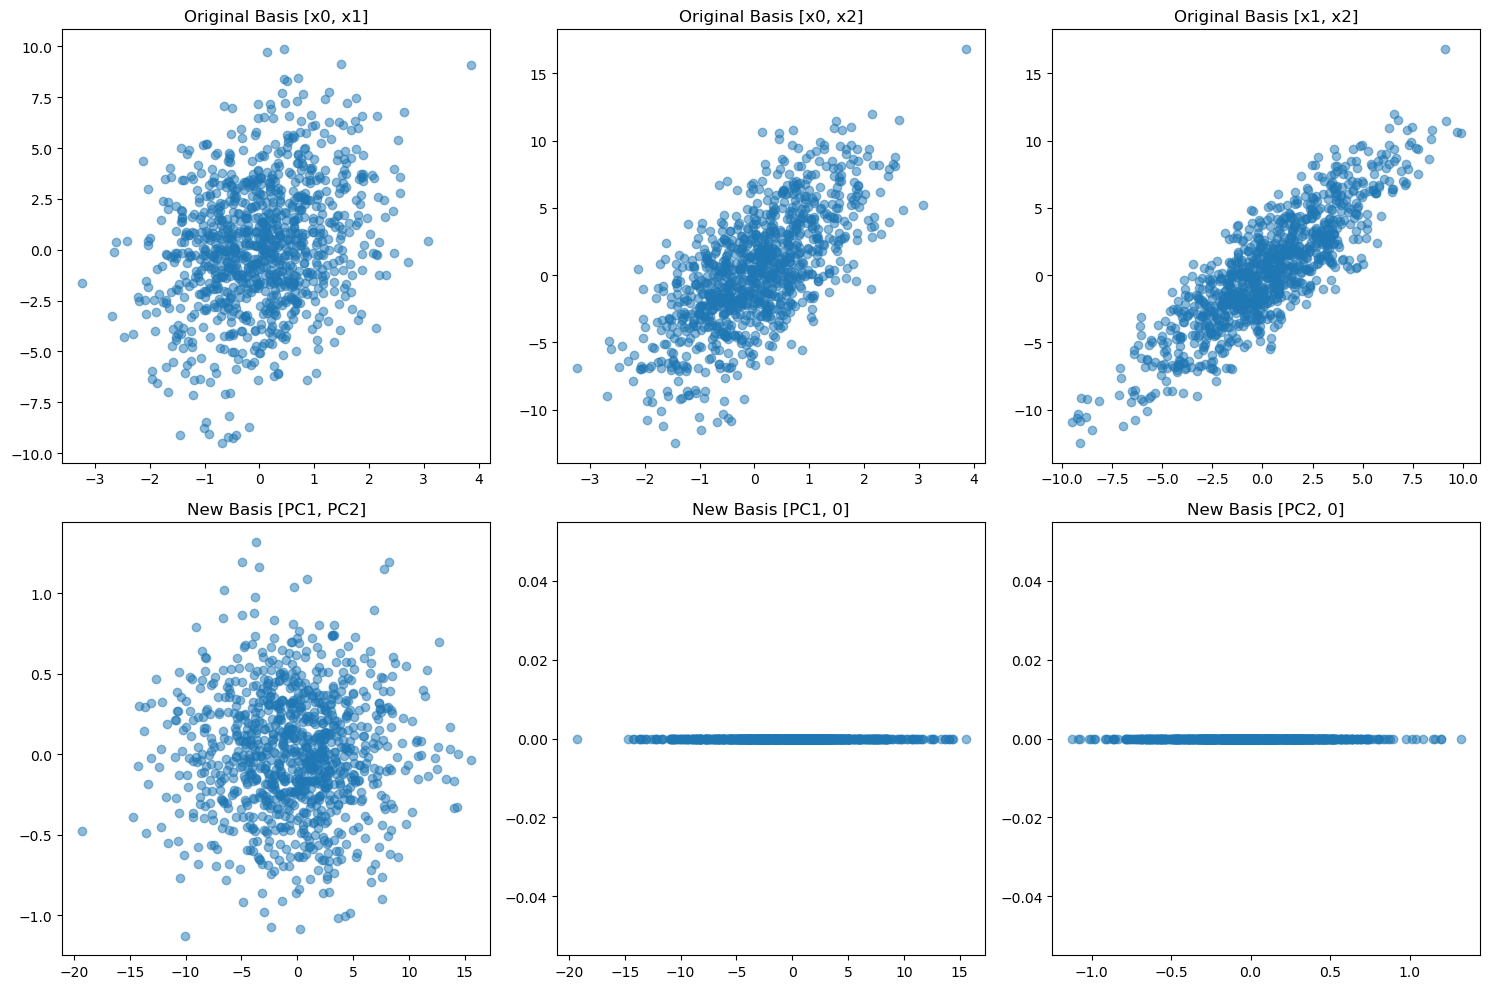

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate the dataset
def generate_dataset(N):
    np.random.seed(42)
    mu = [0, 0, 0]
    sigma = [1, 3, 1]

    x1 = np.random.normal(mu[0], sigma[0], N)
    x2 = x1 + np.random.normal(mu[1], sigma[1], N)
    x3 = 2 * x1 + x2 + np.random.normal(mu[2], sigma[2], N)

    data = np.vstack((x1, x2, x3)).T
    return data

# Function for PCA using eigendecomposition
def pca_eigendecomposition(data):
    covariance_matrix = np.cov(data, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    return eigenvalues, eigenvectors

# Function for PCA using SVD
def pca_svd(data):
    _, _, vh = np.linalg.svd(data - np.mean(data, axis=0), full_matrices=False)
    eigenvectors = vh.T
    eigenvalues = (np.linalg.norm(data - np.mean(data, axis=0), axis=0)**2) / (data.shape[0] - 1)
    return eigenvalues, eigenvectors

# Generating the dataset
N = 1000
data = generate_dataset(N)

# Performing PCA using eigendecomposition
eigenvalues_eig, eigenvectors_eig = pca_eigendecomposition(data)

# Performing PCA using SVD
eigenvalues_svd, eigenvectors_svd = pca_svd(data)

# Checking if the results are the same
print("Eigendecomposition vs. SVD:")
print("Eigenvectors:")
print(eigenvectors_eig)
print(eigenvectors_svd)
print("\nEigenvalues:")
print(eigenvalues_eig)
print(eigenvalues_svd)

# Calculating the percentage of total variability explained by each principal component
explained_var = eigenvalues_eig / np.sum(eigenvalues_eig) * 100
print("\nExplained Variability:")
print(explained_var)

# Reducing dimensionality to retain at least 99% of the total variability
cumulative_var = np.cumsum(explained_var)
num_components_99 = np.argmax(cumulative_var >= 99) + 1

# Redefining the data according to the new basis from PCA
data_pca = data.dot(eigenvectors_eig[:, :num_components_99])

# Plot the data in the original and new basis
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original basis
axes[0, 0].scatter(data[:, 0], data[:, 1], alpha=0.5)
axes[0, 0].set_title('Original Basis [x0, x1]')
axes[0, 1].scatter(data[:, 0], data[:, 2], alpha=0.5)
axes[0, 1].set_title('Original Basis [x0, x2]')
axes[0, 2].scatter(data[:, 1], data[:, 2], alpha=0.5)
axes[0, 2].set_title('Original Basis [x1, x2]')

# New basis from PCA
axes[1, 0].scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5)
axes[1, 0].set_title('New Basis [PC1, PC2]')
axes[1, 1].scatter(data_pca[:, 0], np.zeros_like(data_pca[:, 0]), alpha=0.5)
axes[1, 1].set_title('New Basis [PC1, 0]')
axes[1, 2].scatter(data_pca[:, 1], np.zeros_like(data_pca[:, 1]), alpha=0.5)
axes[1, 2].set_title('New Basis [PC2, 0]')

plt.tight_layout()
plt.show()


2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

Original vs. Noisy Dataset:
Eigenvectors (Original):
[[-0.10894635 -0.86337105  0.49266736]
 [-0.56735918 -0.35295361 -0.74399416]
 [-0.81623174  0.36057479  0.45138848]]

Eigenvectors (Noisy):
[[-1.08946423e-01 -4.92662974e-01 -8.63270582e-01 -2.94795303e-03
   6.57478709e-03 -7.99173172e-04 -4.37701979e-03 -5.87337993e-03
  -4.95201958e-03  2.32858937e-03  5.20104749e-03  3.21501332e-03
  -2.05650141e-03]
 [-5.67358541e-01  7.43988794e-01 -3.52915012e-01  4.94111287e-04
   2.45400656e-03 -1.50728160e-03 -1.94597010e-03 -3.83572539e-03
  -1.52211011e-04  5.74010057e-04  7.58065583e-04  2.78600072e-03
  -4.77315679e-04]
 [-8.16231153e-01 -4.51381809e-01  3.60547183e-01 -3.74556187e-04
  -1.63404765e-03  1.26796385e-03  1.52155924e-03  3.96256952e-03
   7.45316857e-04 -6.18471947e-04 -4.64597651e-04 -1.74644504e-03
   5.07497498e-04]
 [ 1.96415685e-04  4.58112084e-05  4.83184784e-03  1.84837103e-01
   8.47574543e-01 -1.33009044e-01  6.58187327e-02 -1.67250989e-01
  -1.79511325e-01 -6.99

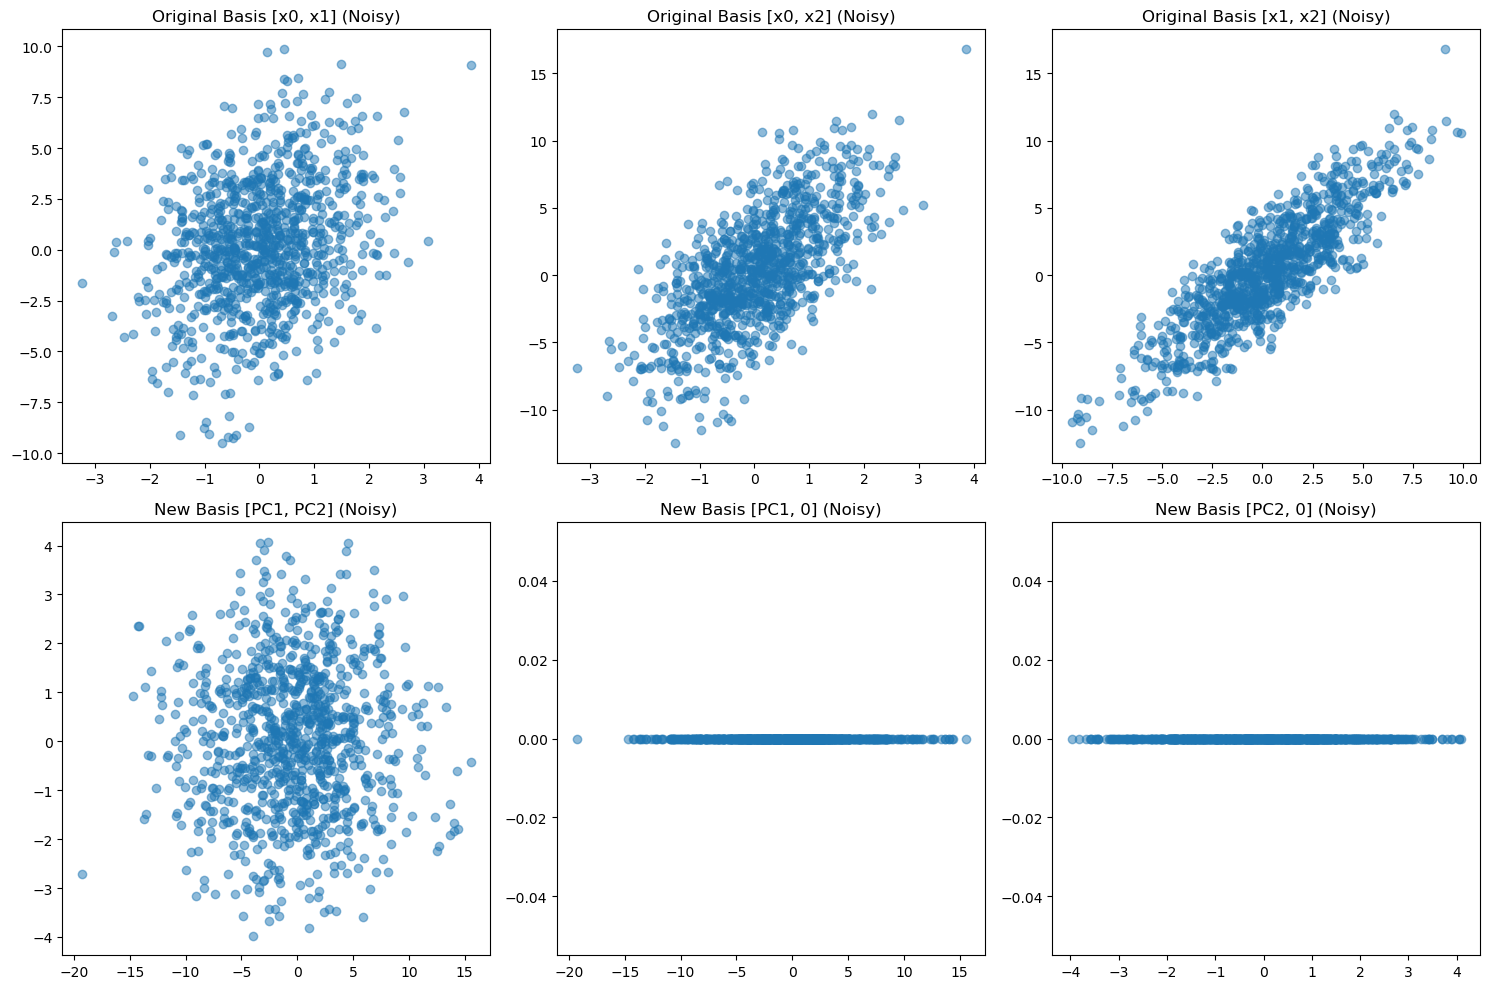

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate the dataset with additional uncorrelated noise
def generate_noisy_dataset(N, num_noise_variables=10, noise_factor=20):
    np.random.seed(42)
    mu = [0, 0, 0]
    sigma = [1, 3, 1]

    x1 = np.random.normal(mu[0], sigma[0], N)
    x2 = x1 + np.random.normal(mu[1], sigma[1], N)
    x3 = 2 * x1 + x2 + np.random.normal(mu[2], sigma[2], N)

    # Generate uncorrelated noise variables with smaller standard deviation
    noise = np.random.normal(0, sigma[0] / noise_factor, size=(N, num_noise_variables))

    # Combine original variables and noise
    data = np.hstack((x1.reshape(-1, 1), x2.reshape(-1, 1), x3.reshape(-1, 1), noise))
    return data

# Generating the noisy dataset
N = 1000
data_noisy = generate_noisy_dataset(N)

# Performing PCA on the noisy dataset using eigendecomposition
eigenvalues_noisy, eigenvectors_noisy = pca_eigendecomposition(data_noisy)

# Checking if the results are the same
print("Original vs. Noisy Dataset:")
print("Eigenvectors (Original):")
print(eigenvectors_eig)
print("\nEigenvectors (Noisy):")
print(eigenvectors_noisy)
print("\nEigenvalues (Original):")
print(eigenvalues_eig)
print("\nEigenvalues (Noisy):")
print(eigenvalues_noisy)

# Calculating the percentage of total variability explained by each principal component
explained_var_noisy = eigenvalues_noisy / np.sum(eigenvalues_noisy) * 100
print("\nExplained Variability (Original):")
print(explained_var)
print("\nExplained Variability (Noisy):")
print(explained_var_noisy)

# Reducing dimensionality to retain at least 99% of the total variability
cumulative_var_noisy = np.cumsum(explained_var_noisy)
num_components_99_noisy = np.argmax(cumulative_var_noisy >= 99) + 1

# Redefining the data according to the new basis from PCA
data_pca_noisy = data_noisy.dot(eigenvectors_noisy[:, :num_components_99_noisy])

# Plotting the data in the original and new basis for the noisy dataset
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original basis for the noisy dataset
axes[0, 0].scatter(data_noisy[:, 0], data_noisy[:, 1], alpha=0.5)
axes[0, 0].set_title('Original Basis [x0, x1] (Noisy)')
axes[0, 1].scatter(data_noisy[:, 0], data_noisy[:, 2], alpha=0.5)
axes[0, 1].set_title('Original Basis [x0, x2] (Noisy)')
axes[0, 2].scatter(data_noisy[:, 1], data_noisy[:, 2], alpha=0.5)
axes[0, 2].set_title('Original Basis [x1, x2] (Noisy)')

# New basis from PCA for the noisy dataset
axes[1, 0].scatter(data_pca_noisy[:, 0], data_pca_noisy[:, 1], alpha=0.5)
axes[1, 0].set_title('New Basis [PC1, PC2] (Noisy)')
axes[1, 1].scatter(data_pca_noisy[:, 0], np.zeros_like(data_pca_noisy[:, 0]), alpha=0.5)
axes[1, 1].set_title('New Basis [PC1, 0] (Noisy)')
axes[1, 2].scatter(data_pca_noisy[:, 1], np.zeros_like(data_pca_noisy[:, 1]), alpha=0.5)
axes[1, 2].set_title('New Basis [PC2, 0] (Noisy)')

plt.tight_layout()
plt.show()

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [3]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 